In [150]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [151]:
df = pd.read_csv('./data/MBA.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


In [152]:
df.describe()

,application_id,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000,6194.000000
mean,3097.500000,3.250714,651.092993,5.016952
std,1788.198115,0.151541,49.294883,1.032432
min,1.000000,2.650000,570.000000,1.000000
25%,1549.250000,3.150000,610.000000,4.000000
50%,3097.500000,3.250000,650.000000,5.000000
75%,4645.750000,3.350000,680.000000,6.000000
max,6194.000000,3.770000,780.000000,9.000000


In [153]:
# 쓰잘데기 없는 column 삭제
X = df.drop(['application_id','admission','international'], axis = 1)
y = df['admission']


X.describe()


,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


In [154]:
# race 결측치 처리
X.loc[X['race'].isna(), 'race'] = 'international'
X['work_industry']

0          Financial Services
1       Investment Management
2                  Technology
3                  Technology
4                  Consulting
                ...          
6189                    Other
6190               Consulting
6191              Health Care
6192                    Other
6193               Consulting
Name: work_industry, Length: 6194, dtype: object

In [155]:
# admission 결측치/이상치 처리 + 이진화
y = y.replace('Admit', 1)
y = y.replace('Waitlist', 0)
y = y.fillna(0)
y

C:\Users\playdata2\AppData\Local\Temp\ipykernel_9512\229104312.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace('Waitlist', 0)


0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
6189    0.0
6190    0.0
6191    1.0
6192    0.0
6193    0.0
Name: admission, Length: 6194, dtype: float64

In [156]:
from sklearn.preprocessing import LabelEncoder

# 범주형 특성 encoding

# gender LabelEncoding : 여자0, 남자1
encoder = LabelEncoder()
encoded_gender = encoder.fit_transform(X['gender'])
X['gender_encoded'] = encoded_gender
X[('race')].value_counts()

race
international    1842
White            1456
Asian            1147
Black             916
Hispanic          596
Other             237
Name: count, dtype: int64

In [157]:
from sklearn.preprocessing import OneHotEncoder

# major One-hotEncoding

encoder = OneHotEncoder(sparse_output = False)
temp = pd.DataFrame(X['major'])
encoded_major = encoder.fit_transform(temp)
encoded_major_df = pd.DataFrame(encoded_major, columns = encoder.get_feature_names_out(['major']))

# 인코딩된 3열의 데이터 X에 추가
X = pd.concat([X, encoded_major_df], axis = 1)
X

,gender,gpa,major,race,gmat,work_exp,work_industry,gender_encoded,major_Business,major_Humanities,major_STEM
0,Female,3.30,Business,Asian,620.0,3.0,Financial Services,0,1.0,0.0,0.0
1,Male,3.28,Humanities,Black,680.0,5.0,Investment Management,1,0.0,1.0,0.0
2,Female,3.30,Business,international,710.0,5.0,Technology,0,1.0,0.0,0.0
3,Male,3.47,STEM,Black,690.0,6.0,Technology,1,0.0,0.0,1.0
4,Male,3.35,STEM,Hispanic,590.0,5.0,Consulting,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
6189,Male,3.49,Business,White,640.0,5.0,Other,1,1.0,0.0,0.0
6190,Male,3.18,STEM,Black,670.0,4.0,Consulting,1,0.0,0.0,1.0
6191,Female,3.22,Business,international,680.0,5.0,Health Care,0,1.0,0.0,0.0
6192,Male,3.36,Business,international,590.0,5.0,Other,1,1.0,0.0,0.0


In [158]:
# race OneHotEncoding
encoder = OneHotEncoder(sparse_output = False)
temp = pd.DataFrame(X['race'])
encoded_race = encoder.fit_transform(temp)
encoded_race_df = pd.DataFrame(encoded_race, columns = encoder.get_feature_names_out(['race']))

# 인코딩된 3열의 데이터 X에 추가
X = pd.concat([X, encoded_race_df], axis = 1)
X

,gender,gpa,major,race,gmat,work_exp,work_industry,gender_encoded,major_Business,major_Humanities,major_STEM,race_Asian,race_Black,race_Hispanic,race_Other,race_White,race_international
0,Female,3.30,Business,Asian,620.0,3.0,Financial Services,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Male,3.28,Humanities,Black,680.0,5.0,Investment Management,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Female,3.30,Business,international,710.0,5.0,Technology,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Male,3.47,STEM,Black,690.0,6.0,Technology,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Male,3.35,STEM,Hispanic,590.0,5.0,Consulting,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,Male,3.49,Business,White,640.0,5.0,Other,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6190,Male,3.18,STEM,Black,670.0,4.0,Consulting,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
6191,Female,3.22,Business,international,680.0,5.0,Health Care,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6192,Male,3.36,Business,international,590.0,5.0,Other,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [159]:
# work_industry OneHotEncoding
encoder = OneHotEncoder(sparse_output = False)
temp = pd.DataFrame(X['work_industry'])
encoded_work_industry = encoder.fit_transform(temp)
encoded_work_industry_df = pd.DataFrame(encoded_work_industry, columns = encoder.get_feature_names_out(['work_industry']))

# 인코딩된 3열의 데이터 X에 추가
X = pd.concat([X, encoded_work_industry_df], axis = 1)
X

,gender,gpa,major,race,gmat,work_exp,work_industry,gender_encoded,major_Business,major_Humanities,...,work_industry_Health Care,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology
0,Female,3.30,Business,Asian,620.0,3.0,Financial Services,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Male,3.28,Humanities,Black,680.0,5.0,Investment Management,1,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Female,3.30,Business,international,710.0,5.0,Technology,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Male,3.47,STEM,Black,690.0,6.0,Technology,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Male,3.35,STEM,Hispanic,590.0,5.0,Consulting,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,Male,3.49,Business,White,640.0,5.0,Other,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6190,Male,3.18,STEM,Black,670.0,4.0,Consulting,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6191,Female,3.22,Business,international,680.0,5.0,Health Care,0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6192,Male,3.36,Business,international,590.0,5.0,Other,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [160]:
# work_exp 범주화 #TODO 값을 각 범주의 평균값으로 잡는게 더 나을듯
print(X['work_exp'].value_counts())

sum_under3 = X.loc[X['work_exp'] <= 3, 'work_exp'].sum()
count_under3 = X[X['work_exp'] <= 3].value_counts().sum()
mean_under3 = sum_under3 / count_under3

sum_4to6 = X.loc[(X['work_exp'] <= 6) & (X['work_exp'] >= 4), 'work_exp'].sum()
count_4to6 = X.loc[(X['work_exp'] <= 6) & (X['work_exp'] >= 4)].value_counts().sum()
mean_4to6 = sum_4to6 / count_4to6


sum_upper7 = X.loc[X['work_exp'] >= 7, 'work_exp'].sum() 
count_upper7 = X[X['work_exp'] >= 7].value_counts().sum()
mean_upper7 = sum_upper7 / count_upper7

print(mean_under3, mean_4to6, mean_upper7)


work_exp
5.0    2419
6.0    1528
4.0    1437
3.0     369
7.0     367
8.0      38
2.0      32
9.0       2
1.0       2
Name: count, dtype: int64
2.9106699751861043 5.016901931649332 7.103194103194103


In [161]:
# 범주화(대표값 = 평균)
work_exp_categorized = []

X.loc[X['work_exp'] <= 3, 'work_exp_categorized'] = mean_under3
X.loc[(X['work_exp'] <= 6) & (X['work_exp'] >= 4), 'work_exp_categorized'] = mean_4to6
X.loc[X['work_exp'] >= 7, 'work_exp_categorized'] = mean_upper7

X

,gender,gpa,major,race,gmat,work_exp,work_industry,gender_encoded,major_Business,major_Humanities,...,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology,work_exp_categorized
0,Female,3.30,Business,Asian,620.0,3.0,Financial Services,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.910670
1,Male,3.28,Humanities,Black,680.0,5.0,Investment Management,1,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.016902
2,Female,3.30,Business,international,710.0,5.0,Technology,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.016902
3,Male,3.47,STEM,Black,690.0,6.0,Technology,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.016902
4,Male,3.35,STEM,Hispanic,590.0,5.0,Consulting,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.016902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,Male,3.49,Business,White,640.0,5.0,Other,1,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.016902
6190,Male,3.18,STEM,Black,670.0,4.0,Consulting,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.016902
6191,Female,3.22,Business,international,680.0,5.0,Health Care,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.016902
6192,Male,3.36,Business,international,590.0,5.0,Other,1,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.016902


In [162]:
# 안 쓸 컬럼 삭제
X = X.drop(['gender','major', 'race', 'work_exp', 'work_industry'], axis = 1)
X

,gpa,gmat,gender_encoded,major_Business,major_Humanities,major_STEM,race_Asian,race_Black,race_Hispanic,race_Other,...,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology,work_exp_categorized
0,3.30,620.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.910670
1,3.28,680.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.016902
2,3.30,710.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.016902
3,3.47,690.0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.016902
4,3.35,590.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.016902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,3.49,640.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.016902
6190,3.18,670.0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.016902
6191,3.22,680.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.016902
6192,3.36,590.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.016902


In [163]:
from sklearn.model_selection import train_test_split

# 훈련 / 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [164]:
# scaling(pipeline에 추가하면서 별 필요 없어짐)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<Axes: >

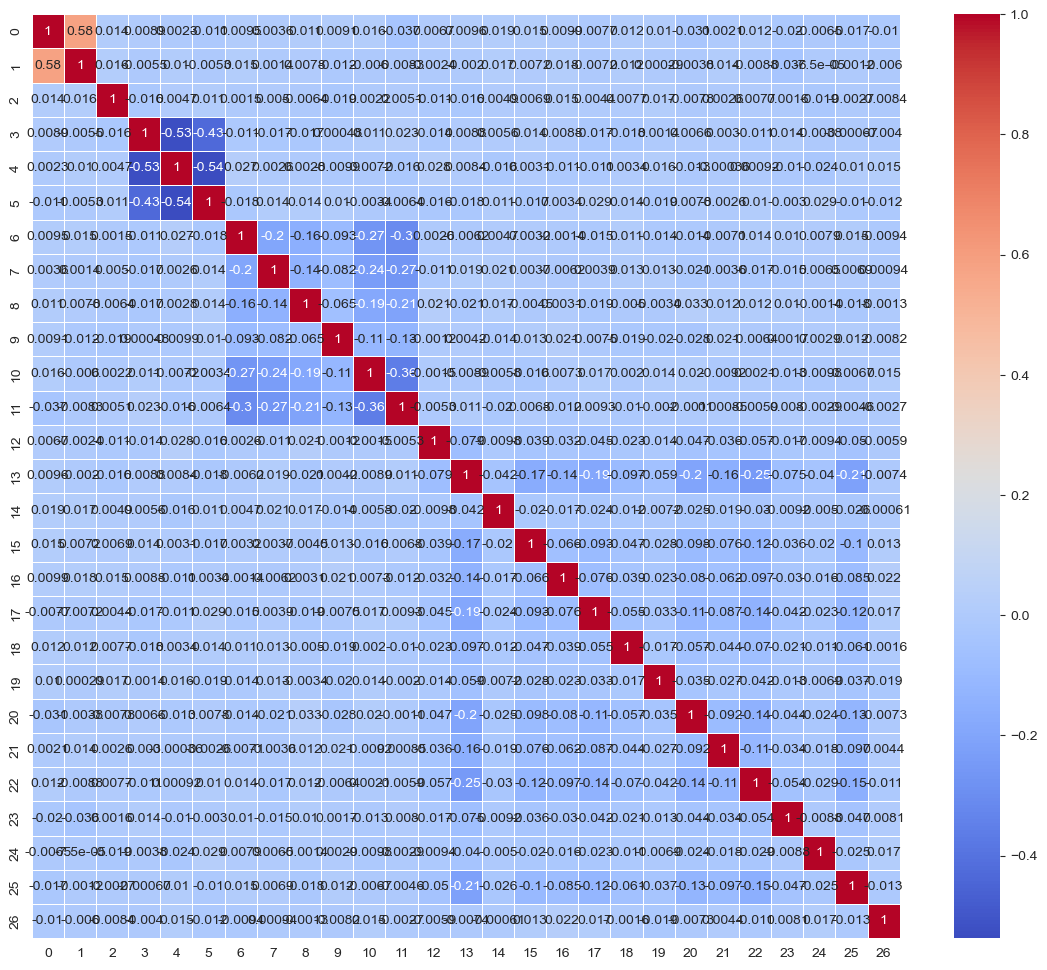

In [165]:
X_train_scaled_df = pd.DataFrame(X_train_scaled)
corr_matrix = X_train_scaled_df.corr()
plt.figure(figsize = (14, 12))  # 히트맵의 크기를 조절
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5)

# gmat과 gpa 사이에 강한 양의 상관관계가 있음
# one-hot encoding된 특성들끼리 음의 상관관계를 가지는 것 외에는 독립변수간에 유의미한 상관관계를 가진 경우는 더 없음

In [166]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# dt_clf = DecisionTreeClassifier(max_depth = 7)
# val_model = cross_val_score(dt_clf, X, y, cv=5)
# 
# 
# dt_param_grid = {
#     'max_depth': [3, 5, 10, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 3, 4]
# }
# grid_search_dt = GridSearchCV(dt_clf, dt_param_grid, cv=5)
# grid_search_dt.fit(X, y)


In [167]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# 특성 공학 + 스케일링 + 결정트리 파이프라인
poly = PolynomialFeatures()
dt_clf = DecisionTreeClassifier(max_depth = 7)
pipeline = Pipeline([
    ('poly_features', poly),
    ('scaler', scaler),
    ('dt_clf', dt_clf)
])

In [168]:
# 교차 검증
val_scores = cross_val_score(pipeline, X, y, cv = 5)
print("Cross_Val Scores:", val_scores)
print("Mean Cross_Val Score:", val_scores.mean())

# 하이퍼파라미터 튜닝
params = {
    'dt_clf__max_depth': [2,3,4,5,6],
    'dt_clf__min_samples_split': [2,3,4,5,6,7],
    'dt_clf__min_samples_leaf': [1,2,3,4,5,6,7]
}
grid_search_cv = GridSearchCV(pipeline, params, cv = 5, n_jobs = -1)
grid_search_cv.fit(X, y)

# 최적 파라미터, 점수
print("Best Params:", grid_search_cv.best_params_)
print("Best Cross_Val Score:", grid_search_cv.best_score_)

Cross_Val Scores: [0.84665052 0.8385795  0.84503632 0.8377724  0.84894992]
Mean Cross_Val Score: 0.8433977320289305
Best Params: {'dt_clf__max_depth': 2, 'dt_clf__min_samples_leaf': 1, 'dt_clf__min_samples_split': 2}
Best Cross_Val Score: 0.8546980797740634


C:\Users\playdata2\anaconda3\envs\ml_env\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 파이프라인
poly = PolynomialFeatures()
scaler = StandardScaler()
lr_clf = LogisticRegression(solver = 'saga', penalty='elasticnet', max_iter = 2000) # 로지스틱회귀에 elasticnet 적용

pipeline = Pipeline([
    ('poly_features', poly),
    ('scaler', scaler),
    ('lr_clf', lr_clf)
])

# 하이퍼파라미터 튜닝
params = {
    'lr_clf__C': [0.01, 0.1, 1, 10, 100],        # 정규화 강도
    'lr_clf__l1_ratio': [0.1, 0.5, 0.7, 0.9]     # L1과 L2 비율 조정
}

grid_search_cv = GridSearchCV(pipeline, params, cv=5, n_jobs = -1)
grid_search_cv.fit(X, y)

# 최적 파라미터, 점수
print("Best Params:", grid_search_cv.best_params_)
print("Best Cross_Val:", grid_search_cv.best_score_)

C:\Users\playdata2\anaconda3\envs\ml_env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\playdata2\anaconda3\envs\ml_env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\playdata2\anaconda3\envs\ml_env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\playdata2\anaconda3\envs\ml_env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\playdata2\anaconda3\envs\ml_env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\playdata2\anaconda3\e